<a href="https://colab.research.google.com/github/Kchaluntorn/-/blob/master/trie_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import cv2
import os

import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm
import numpy as np
from random import shuffle
from imageio import imread

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# https://www.kaggle.com/c/dogs-vs-cats/data
src_directory = "/content/drive/My Drive/Colab Notebooks/train.zip"
print(src_directory)

/content/drive/My Drive/Colab Notebooks/train.zip


In [ ]:
import zipfile

print(src_directory)
with zipfile.ZipFile(src_directory, 'r') as z:
    z.extractall()

/content/drive/My Drive/Colab Notebooks/train.zip


In [ ]:
import os
import cv2

def load_image(file_path):
    return cv2.imread(file_path)

train_path = "./train/"
image_files = os.listdir(train_path)


In [ ]:
TRAIN_DIR = 'train'
#TEST_DIR = './test'
IMG_SIZE = 200

In [ ]:
def create_label(image_name):
    word_label = image_name.split('.')[-3]
    if word_label == 'cat':
        return np.array(1)
    elif word_label == 'dog':
        return np.array(0)

In [ ]:
dim = (128,128)
def create_train_data():
    training_data =[]
    for img in tqdm(os.listdir(TRAIN_DIR)):
        path = os.path.join(TRAIN_DIR,img)
        img_data = cv2.imread(path)
        img_data = cv2.resize(img_data,(60,60))
        training_data.append([np.array(img_data),create_label(img)])
    shuffle(training_data)
    np.save('train_data.npy',training_data)
    return training_data

In [ ]:
train_data = create_train_data()
print(train_data)
#data = np.load('/content/train_data.npy')

100%|██████████| 4001/4001 [00:09<00:00, 424.55it/s]
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
train = train_data[:-2000] #0-300
test = train_data[-2000:] #300-0

X_train = np.array([i[0] for i in train]).reshape(-1,60,60,3) / 255
y_train = np.array([i[1] for i in train])
X_test = np.array([i[0] for i in test]).reshape(-1,60,60,3) / 255 #/255 คือเอา rgb ออก
y_test = np.array([i[1] for i in test])

In [ ]:
 import pickle

In [ ]:
pickle.dump(X_train, open('X_train.pkl', 'wb'))
pickle.dump(y_train, open('y_train.pkl', 'wb'))
pickle.dump(X_test, open('X_test.pkl', 'wb'))
pickle.dump(y_test, open('y_test.pkl', 'wb'))

In [ ]:
X_train

array([[[[0.05098039, 0.05098039, 0.05098039],
         [0.04313725, 0.04313725, 0.04313725],
         [0.05098039, 0.05098039, 0.05098039],
         ...,
         [0.05490196, 0.07843137, 0.05882353],
         [0.04705882, 0.05882353, 0.07843137],
         [0.07843137, 0.08235294, 0.12156863]],

        [[0.09411765, 0.08235294, 0.06666667],
         [0.09019608, 0.07843137, 0.0627451 ],
         [0.07843137, 0.06666667, 0.05098039],
         ...,
         [0.05490196, 0.07843137, 0.05882353],
         [0.09803922, 0.10980392, 0.1254902 ],
         [0.02745098, 0.03137255, 0.07058824]],

        [[0.30588235, 0.31372549, 0.34117647],
         [0.44705882, 0.38823529, 0.32941176],
         [0.26666667, 0.15686275, 0.14901961],
         ...,
         [0.07843137, 0.08627451, 0.08627451],
         [0.06666667, 0.07843137, 0.09411765],
         [0.03137255, 0.05490196, 0.0745098 ]],

        ...,

        [[0.03921569, 0.05882353, 0.05490196],
         [0.03921569, 0.05882353, 0.05490196]

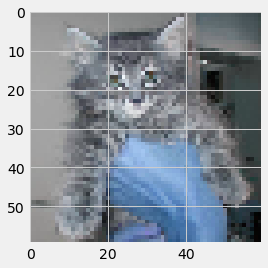

In [ ]:
plt.imshow(X_train[7].reshape(60,60,3))

cnn model มาจากทั่วโลกแล้วมาเทรนเองต่อ

In [ ]:
# base_model = tf.keras.applications.MobileNetV2(input_shape=(128,128,3),include_top=False,weights="imagenet")

In [ ]:
# base_model.summary()

In [ ]:
# base_model.trainnable = False

Add custom head

In [ ]:
# average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
# prediction_layer = tf.keras.layers.Dense(units=1,activation='sigmoid')(average_pooling_layer)

In [ ]:
# model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)

In [ ]:
# base_model.summary()

In [ ]:
# model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# model.fit_generator(X_train,epochs=25, validation_data=y_train)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [ ]:
X_train

array([[[[0.05098039, 0.05098039, 0.05098039],
         [0.04313725, 0.04313725, 0.04313725],
         [0.05098039, 0.05098039, 0.05098039],
         ...,
         [0.05490196, 0.07843137, 0.05882353],
         [0.04705882, 0.05882353, 0.07843137],
         [0.07843137, 0.08235294, 0.12156863]],

        [[0.09411765, 0.08235294, 0.06666667],
         [0.09019608, 0.07843137, 0.0627451 ],
         [0.07843137, 0.06666667, 0.05098039],
         ...,
         [0.05490196, 0.07843137, 0.05882353],
         [0.09803922, 0.10980392, 0.1254902 ],
         [0.02745098, 0.03137255, 0.07058824]],

        [[0.30588235, 0.31372549, 0.34117647],
         [0.44705882, 0.38823529, 0.32941176],
         [0.26666667, 0.15686275, 0.14901961],
         ...,
         [0.07843137, 0.08627451, 0.08627451],
         [0.06666667, 0.07843137, 0.09411765],
         [0.03137255, 0.05490196, 0.0745098 ]],

        ...,

        [[0.03921569, 0.05882353, 0.05490196],
         [0.03921569, 0.05882353, 0.05490196]

In [ ]:
y_train

array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
model = Sequential()

#1 layer
model.add( Conv2D(60,(5,5), activation='relu', input_shape=(60,60,3)) )

model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(60,(5,5),activation='relu'))

model.add(MaxPooling2D(pool_size= (2,2)))

model.add(Flatten())

model.add(Dense(1000, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(500, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(250, activation='relu'))

model.add(Dense(10, activation='softmax'))


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Train on 1800 samples, validate on 201 samples
Epoch 1/10
1800/1800 [==============================] - 31s 17ms/step - loss: 0.6000 - accuracy: 0.6844 - val_loss: 0.6442 - val_accuracy: 0.6617
Epoch 2/10
1800/1800 [==============================] - 31s 17ms/step - loss: 0.5791 - accuracy: 0.6861 - val_loss: 0.7604 - val_accuracy: 0.6020
Epoch 3/10
1800/1800 [==============================] - 31s 17ms/step - loss: 0.5184 - accuracy: 0.7389 - val_loss: 0.7966 - val_accuracy: 0.6169
Epoch 4/10
1800/1800 [==============================] - 31s 17ms/step - loss: 0.4508 - accuracy: 0.7822 - val_loss: 0.7250 - val_accuracy: 0.6866
Epoch 5/10
1800/1800 [==============================] - 31s 17ms/step - loss: 0.3589 - accuracy: 0.8406 - val_loss: 0.9171 - val_accuracy: 0.6368
Epoch 6/10
1800/1800 [==============================] - 31s 17ms/step - loss: 0.3050 - accuracy: 0.8644 - val_loss: 1.1622 - val_accuracy: 0.6219
Epoch 7/10
1800/1800 [==============================] - 31s 17ms/step - loss:

In [ ]:
model.evaluate(X_test,y_test)[1]

2000/2000 [==============================] - 8s 4ms/step


0.6000000238418579

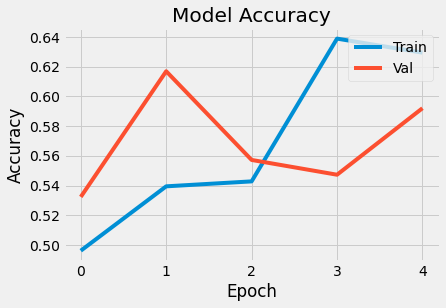

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

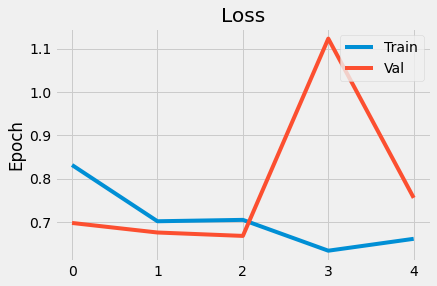

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.ylabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 02-cat-training-NationalGeographic_1484324.ngsversion.1526587209178.adapt.1900.1.jpg to 02-cat-training-NationalGeographic_1484324.ngsversion.1526587209178.adapt.1900.1.jpg


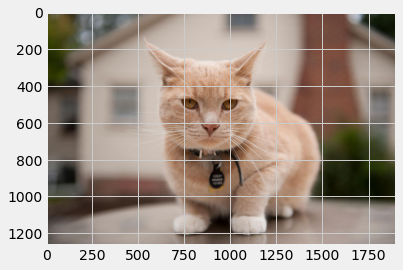

In [ ]:
new_image = plt.imread([''])
img = plt.imshow(new_image)

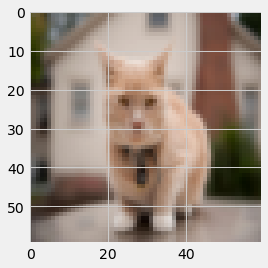

In [ ]:
from skimage.transform import resize
resized_image = resize(new_image, (60,60,3))
img = plt.imshow(resized_image)

In [ ]:
predictions = model.predict(np.array([resized_image]))

predictions

array([[7.4529000e-02, 9.2547101e-01, 7.7329227e-09, 8.1049567e-10,
        9.6619601e-09, 3.1036897e-09, 8.7075858e-09, 9.3263859e-09,
        5.0487325e-09, 7.3213000e-09]], dtype=float32)

In [ ]:
classification = ['dog','cat']

In [ ]:
list_index = [0,1]
x = predictions

for i in range(2):
    for j in range(2):
        if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp
print(list_index)

[1, 0]


In [ ]:
for i in range(2):
  print(classification[list_index[i]],':',round(predictions[0][list_index[i]] * 100,2), '%')

cat : 92.55 %
dog : 7.45 %


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Training Accuracy: "+str(np.round(hist.history["accuracy"][-1]*100,2))+"%")
print("Validation Accuracy: "+str(np.round(hist.history["val_accuracy"][-1]*100,2))+"%")

Training Accuracy: 62.94%
Validation Accuracy: 59.2%


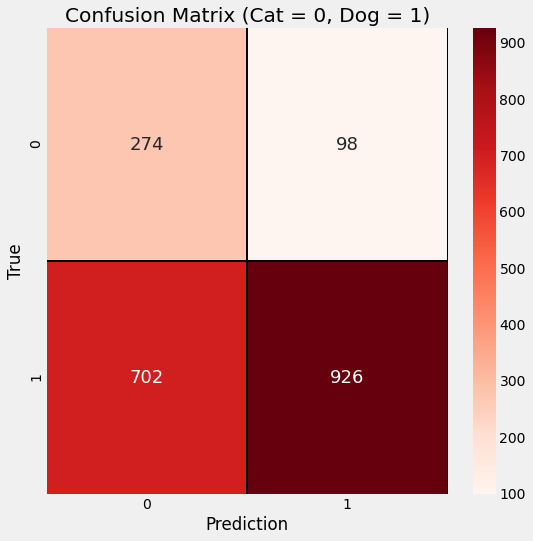

In [ ]:
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(cm,annot = True, linewidths = 0.3,cmap = "Reds",annot_kws = {"size": 18}, linecolor = "black", fmt = ".0f", ax=ax )
plt.xlabel("Prediction")
plt.title("Confusion Matrix (Cat = 0, Dog = 1)")
plt.ylabel("True")
plt.show()

In [ ]:
model.save('catdog_model.h5')

In [ ]:
new_model = tf.keras.models.load_model('catdog_model.h5')

In [ ]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 56, 56, 60)        4560      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8640)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              8641000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)             